# Recognizing digits and numbers in natural scene images
## Part 2: SVHN datasets descriptive analysis

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import sys
from IPython.display import display, Image
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import seaborn as sns

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

### Load train, validation, and test datasets from pickle files

In [2]:
def load_pickle(pickle_file):
    """
    This will load a pickle file with 'images' and 'labels' datasets into two arrays
    """
    try:
        with open(pickle_file, 'rb') as f:
            ds_combined = pickle.load(f)
            ds_images = ds_combined["images"]
            ds_labels = ds_combined["labels"]
            f.close()
            print("Finish to load '%s' file" % pickle_file)
    except Exception as e:
        print('Unable to process data from', pickle_file, ':', e)
        raise
    return ds_images, ds_labels

In [3]:
valid_dataset, valid_labels = load_pickle('valid_SVHN.pickle')
print("Validation dataset shape:", valid_dataset.shape, "Validaton labels shape:", valid_labels.shape) 

Finish to load 'valid_SVHN.pickle' file
Validation dataset shape: (6968, 32, 32) Validaton labels shape: (6968, 5)


In [4]:
test_dataset, test_labels = load_pickle('test_SVHN.pickle')
print("Test dataset shape:", test_dataset.shape, "Test labels shape:", test_labels.shape)

Finish to load 'test_SVHN.pickle' file
Test dataset shape: (6968, 32, 32) Test labels shape: (6968, 5)


In [5]:
train_dataset, train_labels = load_pickle('train_SVHN.pickle')
print("Train dataset shape:", train_dataset.shape, "Train labels shape:", train_labels.shape)

Finish to load 'train_SVHN.pickle' file
Train dataset shape: (32522, 32, 32) Train labels shape: (32522, 5)


In [6]:
sns.set_style({'axes.grid' : False})

In [10]:
def image_show_ds(t_ds_new, t_l_new, name):
    """
    This function shows three randomply picked up images with their labels from a dataset.
    Input are image dataset and corresponding labels dataset.
    """
    print("%s image dataset shape" % name, t_ds_new.shape)
    print("%s labels dataset shape" % name, t_l_new.shape)
    title = ('Three randomly chosen images from the loaded dataset')
    fig = plt.figure(figsize=(18,5))
    counter = 1
    for image_idx_tmp in random.sample(range(t_l_new.shape[0]), 3):
        fig.add_subplot(1, 3, counter)
        plt.imshow(t_ds_new[image_idx_tmp,:,:])
        plt.title("Labels: %s" % t_l_new[image_idx_tmp])
        counter += 1

### Three randomly picked up examples from validation dataset

Validation dataset image dataset shape (6968, 32, 32)
Validation dataset labels dataset shape (6968, 5)


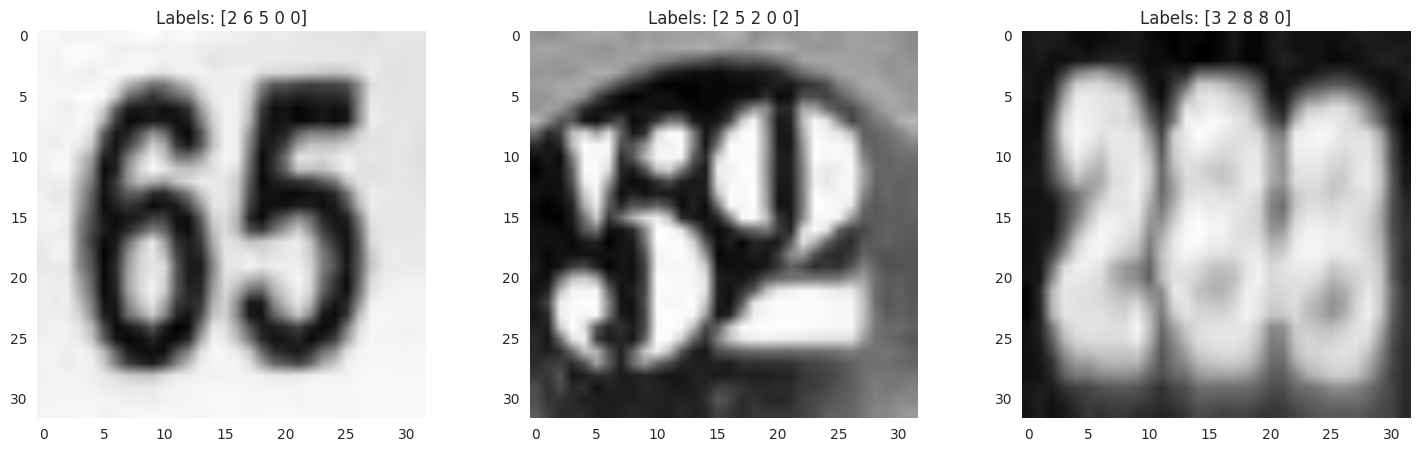

In [12]:
image_show_ds(valid_dataset, valid_labels, "Validation dataset")

### Three randomly picked up examples from test dataset

Test dataset image dataset shape (6968, 32, 32)
Test dataset labels dataset shape (6968, 5)


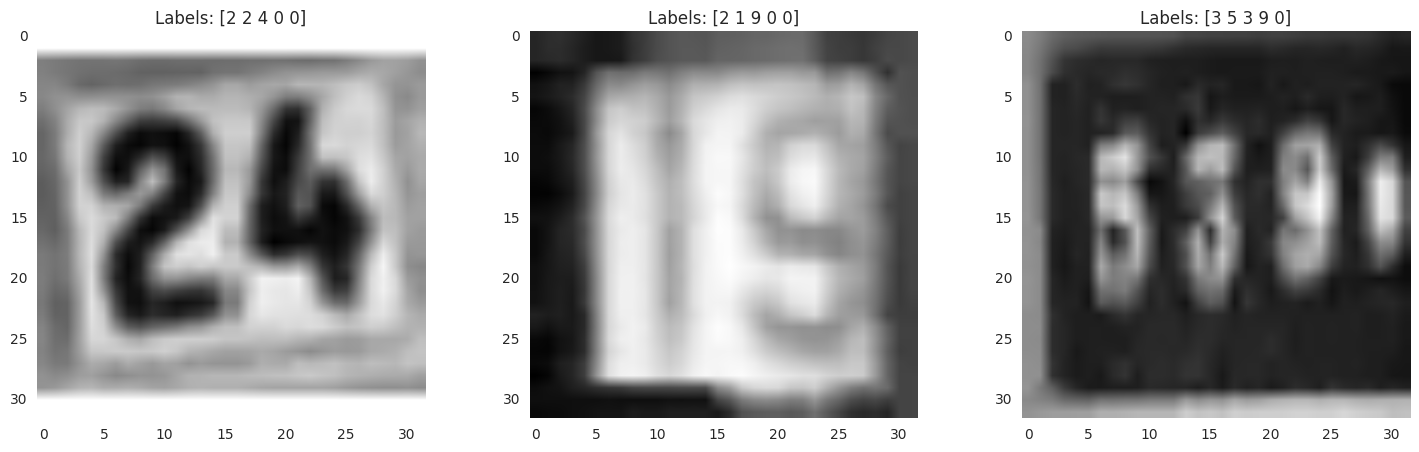

In [13]:
image_show_ds(test_dataset, test_labels, "Test dataset")

### Three randomly picked up examples from train dataset

Train dataset image dataset shape (32522, 32, 32)
Train dataset labels dataset shape (32522, 5)


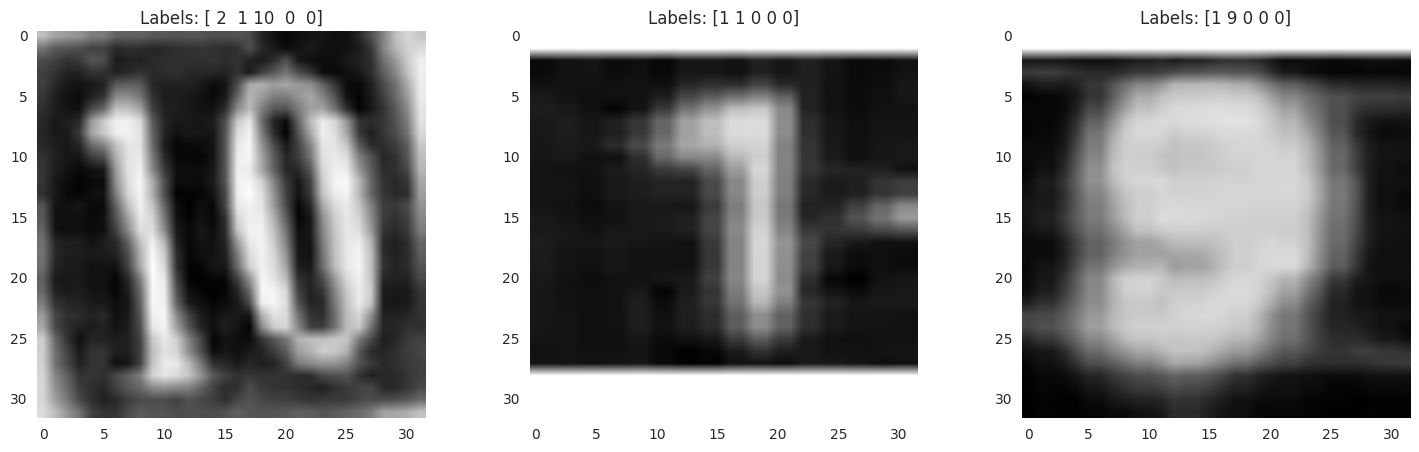

In [14]:
image_show_ds(train_dataset, train_labels, "Train dataset")

In [15]:
sns.set_style({'axes.grid' : True})

In [16]:
def plot_digits(ds_tmp, title_tmp):
    X = list(set(ds_tmp[:, 0]))
    Y = []
    for x_tmp in X:
        Y.append(sum(ds_tmp[:, 0] == x_tmp))
    plt.bar(X, Y, align='center')
    plt.yscale('log')
    plt.xlim(0.5, 4.5)
    plt.title('Digits in the %s dataset' % title_tmp)
    plt.xlabel("Digits in the number on images")
    plt.xticks(range(1,5, 1))
    plt.ylabel("Total number of images")
    return np.array([X, Y]).T

In [17]:
def plot_digits_total(ds_tmp, title_tmp):
    X = range(11)
    Y = []
    for x_tmp in X:
        Y.append(sum(ds_tmp[:, 1:5] == x_tmp).sum())
    Y[0] = Y[10]
    plt.bar(X[:10], Y[:10], align='center')
    plt.xlim(-0.5, 9.5)
    plt.title('Digits distribution in the %s dataset' % title_tmp)
    plt.xlabel("Digit in the number on images")
    plt.xticks(range(10))
    plt.ylabel("Total digits")
    return np.array([X[:10], Y[:10]]).T

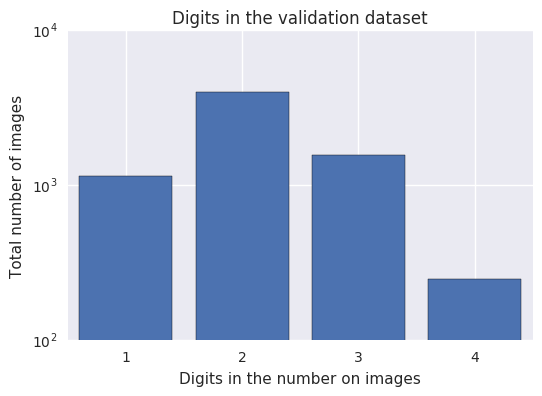

In [18]:
valid_stat_digits = plot_digits(valid_labels, 'validation')

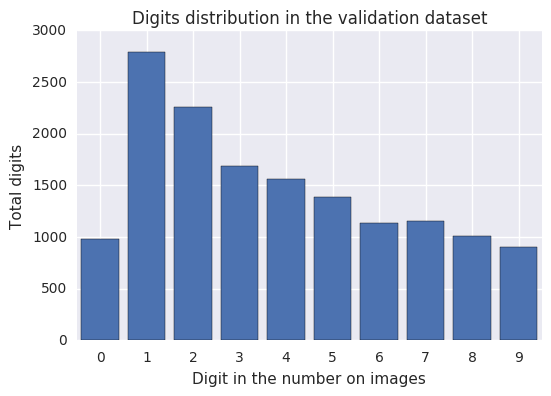

In [19]:
valid_stat_digits_total = plot_digits_total(valid_labels, 'validation')

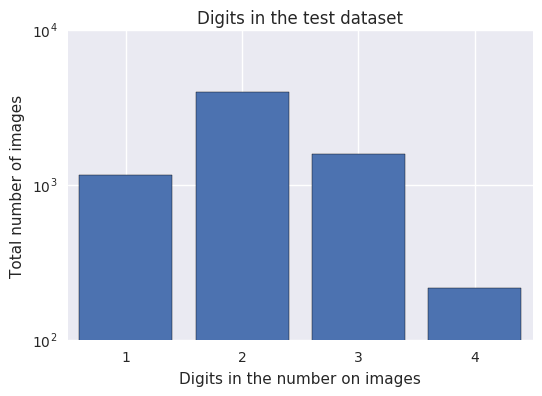

In [20]:
test_stat_digits = plot_digits(test_labels, 'test')

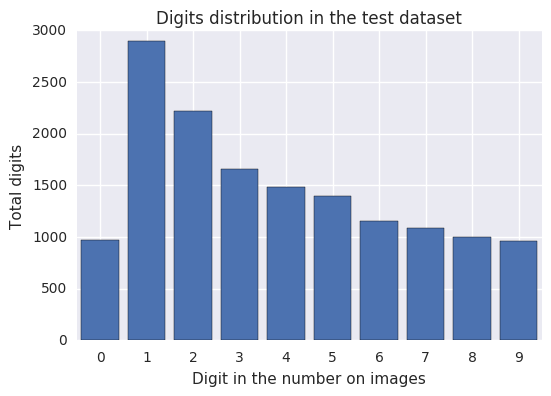

In [21]:
test_stat_digits_total = plot_digits_total(test_labels, 'test')

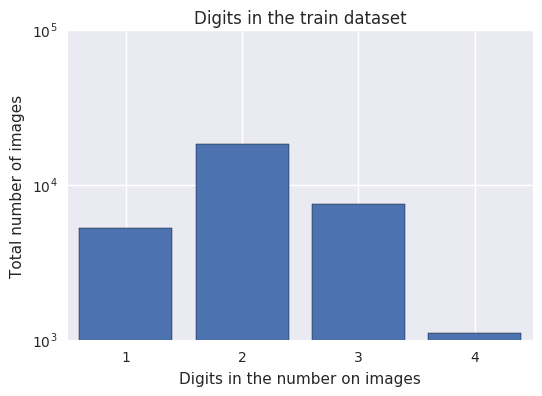

In [22]:
train_stat_digits = plot_digits(train_labels, 'train')

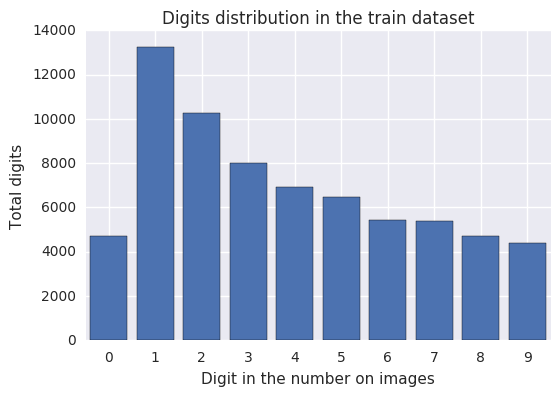

In [23]:
train_stat_digits_total = plot_digits_total(train_labels, 'train')

### Validation, test, and training dataset digits combined distribution

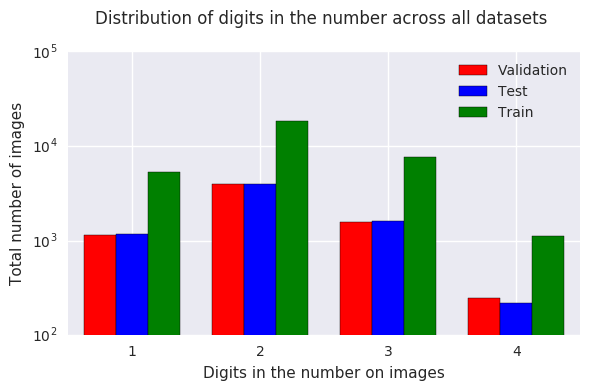

In [24]:
# Digits in the number on image distribution
fig, ax = plt.subplots()

bar_width = 0.25

opacity = 1

valid = plt.bar(valid_stat_digits[:, 0]-0.25, valid_stat_digits[:, 1], -bar_width,
                 alpha=opacity, align='center', color='r', label='Validation')

test = plt.bar(test_stat_digits[:, 0], test_stat_digits[:, 1], bar_width,
                 alpha=opacity, align='center', color='b', label='Test')

train = plt.bar(train_stat_digits[:, 0]+0.25, train_stat_digits[:, 1], bar_width,
                 alpha=opacity, align='center', color='g', label='Train')


plt.yscale('log')
plt.xlim(0.5, 4.5)
plt.title('Distribution of digits in the number across all datasets \n')
plt.xlabel("Digits in the number on images")
plt.ylabel("Total number of images")
plt.xticks()
plt.xticks(range(1,5, 1))
plt.legend()

plt.tight_layout()
plt.show()

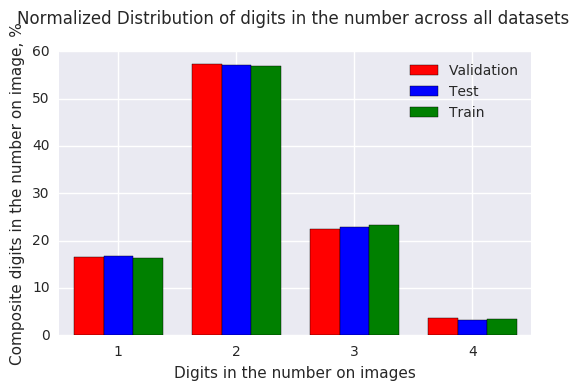

In [25]:
# Digits in the number on image distribution
fig, ax = plt.subplots()

bar_width = 0.25

opacity = 1

valid = plt.bar(valid_stat_digits[:, 0]-0.25, 100.0*valid_stat_digits[:, 1]/sum(valid_stat_digits[:, 1]), -bar_width,
                 alpha=opacity, align='center', color='r', label='Validation')

test = plt.bar(test_stat_digits[:, 0], 100.0*test_stat_digits[:, 1]/sum(test_stat_digits[:, 1]), bar_width,
                 alpha=opacity, align='center', color='b', label='Test')

train = plt.bar(train_stat_digits[:, 0]+0.25, 100.0*train_stat_digits[:, 1]/sum(train_stat_digits[:, 1]), bar_width,
                 alpha=opacity, align='center', color='g', label='Train')


#plt.yscale('log')
plt.xlim(0.5, 4.5)
plt.title('Normalized Distribution of digits in the number across all datasets \n')
plt.xlabel("Digits in the number on images")
plt.ylabel("Composite digits in the number on image, %")
plt.xticks()
plt.xticks(range(1,5, 1))
plt.legend()

plt.tight_layout()
plt.show()

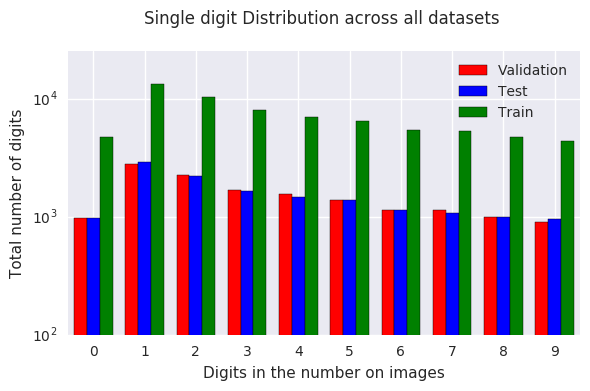

In [26]:
# All Digits distribution
fig, ax = plt.subplots()

bar_width = 0.25

opacity = 1

valid = plt.bar(valid_stat_digits_total[:, 0]-0.25, valid_stat_digits_total[:, 1], -bar_width,
                 alpha=opacity, align='center', color='r', label='Validation')

test = plt.bar(test_stat_digits_total[:, 0], test_stat_digits_total[:, 1], bar_width,
                 alpha=opacity, align='center', color='b', label='Test')

train = plt.bar(train_stat_digits_total[:, 0]+0.25, train_stat_digits_total[:, 1], bar_width,
                 alpha=opacity, align='center', color='g', label='Train')


plt.yscale('log')
plt.xlim(-0.5, 9.5)
plt.ylim(1e2, 2.5e4)
plt.title('Single digit Distribution across all datasets \n')
plt.xlabel("Digits in the number on images")
plt.ylabel("Total number of digits")
plt.xticks()
plt.xticks(range(10))
plt.legend()

plt.tight_layout()
plt.show()

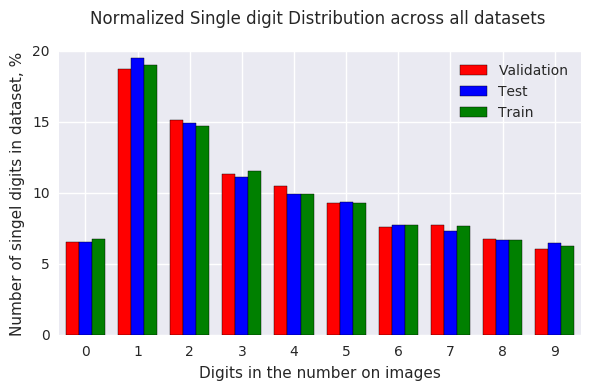

In [27]:
fig, ax = plt.subplots()

bar_width = 0.25

opacity = 1

valid = plt.bar(valid_stat_digits_total[:, 0]-0.25, 100.0*valid_stat_digits_total[:, 1]/sum(valid_stat_digits_total[:, 1]), 
                -bar_width, alpha=opacity, align='center', color='r', label='Validation')

test = plt.bar(test_stat_digits_total[:, 0], 100.0*test_stat_digits_total[:, 1]/sum(test_stat_digits_total[:, 1]), 
               bar_width, alpha=opacity, align='center', color='b', label='Test')

train = plt.bar(train_stat_digits_total[:, 0]+0.25, 100.0*train_stat_digits_total[:, 1]/sum(train_stat_digits_total[:, 1]), 
                bar_width, alpha=opacity, align='center', color='g', label='Train')


#plt.yscale('log')
plt.xlim(-0.5, 9.5)
#plt.ylim(1e3, 1.2e4)
plt.title('Normalized Single digit Distribution across all datasets \n')
plt.xlabel("Digits in the number on images")
plt.ylabel("Number of singel digits in dataset, %")
plt.xticks()
plt.xticks(range(10))
plt.legend()

plt.tight_layout()
plt.show()